MA0218 Exercise 6
=================

**Author:** Hankertrix




# Table of Contents







## Solution



### Problem 1



#### (a)



Import the required libraries.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Set the default theme to seaborn
sb.set_theme()

Import the data.



In [2]:
house_data = pd.read_csv("train.csv")
print(house_data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

Extract `GrLivArea` and `GarageArea` from the data set.



In [3]:
extracted_data = house_data[["GrLivArea", "GarageArea"]]
print(extracted_data.head())

   GrLivArea  GarageArea
0       1710         548
1       1262         460
2       1786         608
3       1717         642
4       2198         836


#### (b)



Visualise the distribution of the two variables above using a scatter plot.



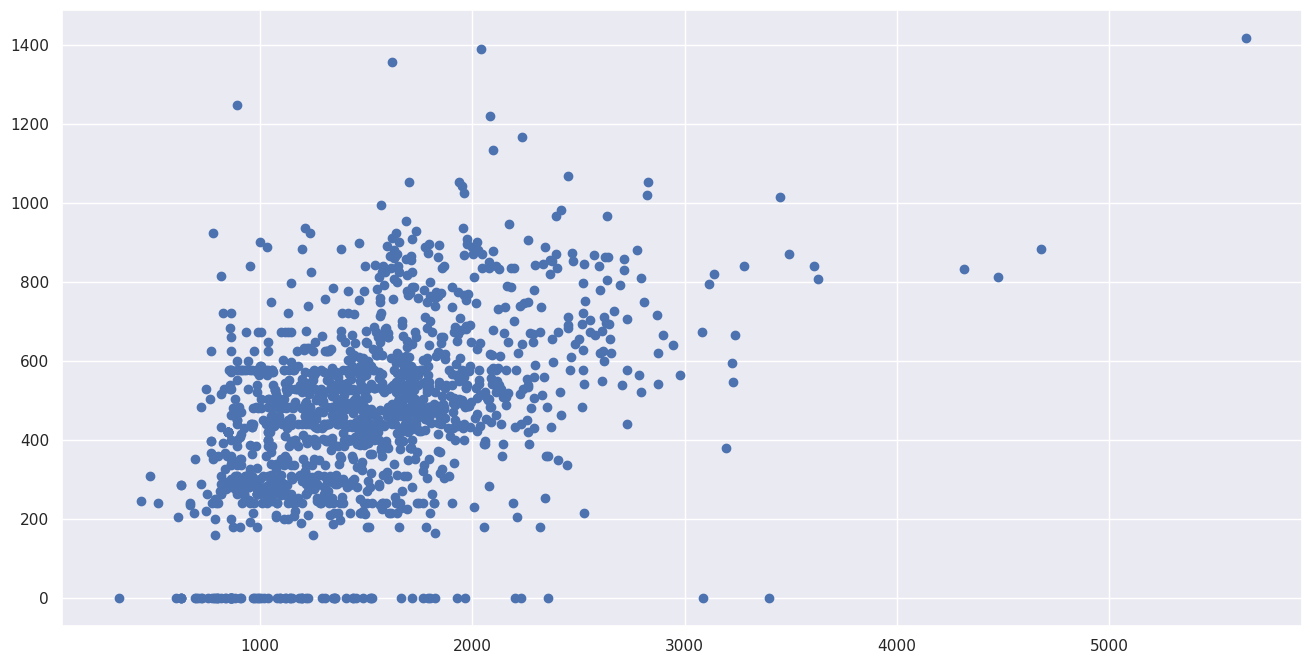

In [4]:
plt.subplots(figsize=(16, 8))
plt.scatter(x="GrLivArea", y="GarageArea", data=extracted_data)

#### (c)



Import the k-means clustering model from `scikit-learn`.



In [5]:
from sklearn.cluster import KMeans

#### (d)



Take a guess on the number of clusters.



In [6]:
number_of_clusters = 4

Create the clustering model.



In [7]:
model = KMeans(n_clusters=number_of_clusters)

Fit the clustering model.



In [8]:
model.fit(extracted_data)

KMeans(n_clusters=4)

#### (e)



Print the cluster centres.



In [9]:
# The list of strings to display.
# We use tab to delimit the columns
centre_str_list: list[str] = [
    f"Features\tGrLivArea\tGarageArea",

    # Empty string for an extra new line
    "",
]

# Iterate over the cluster centres
for index, centre in enumerate(model.cluster_centers_):

    # Get the GrLivArea and the GarageArea of the centre
    gr_liv_area, garage_area = centre

    # Add the cluster number with the data to the list of strings
    centre_str_list.append(
        f"Cluster {index + 1}:\t{gr_liv_area:.2f}\t{garage_area:.2f}"
    )

# Join the list of strings with a new line and print the result
print("\n".join(centre_str_list))

Features	GrLivArea	GarageArea

Cluster 1:	2730.18	701.05
Cluster 2:	966.86	342.43
Cluster 3:	1873.55	574.85
Cluster 4:	1408.52	446.57


Predict the labels for the data using the mode.



In [10]:
labels = model.predict(extracted_data)

Add the cluster label to the data.



In [11]:
labelled_data = extracted_data.copy()
labelled_data["Cluster"] = pd.Categorical(labels)
print(labelled_data.head())

   GrLivArea  GarageArea Cluster
0       1710         548       2
1       1262         460       3
2       1786         608       2
3       1717         642       2
4       2198         836       2


Plot the count plot of the data based on the labels.



<Axes: xlabel='count', ylabel='Cluster'>

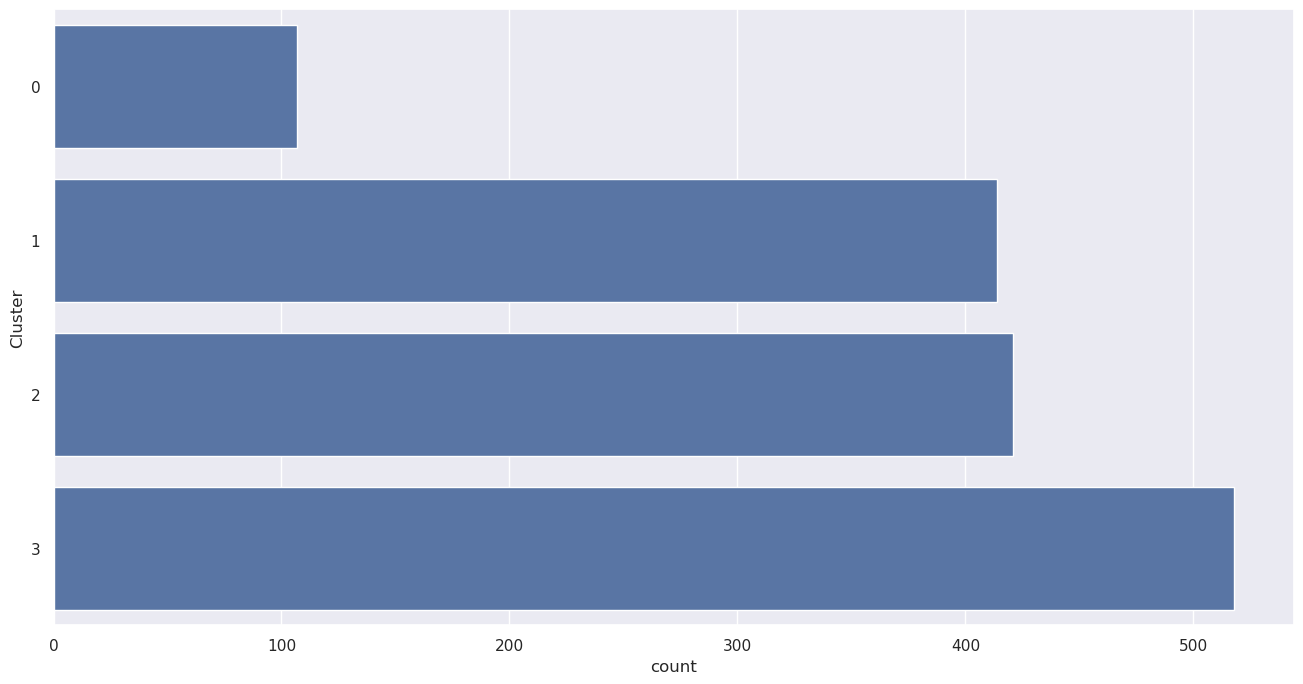

In [12]:
plt.figure(figsize=(16, 8))
sb.countplot(labelled_data["Cluster"])

Visualise the clusters in the data using a scatter plot.



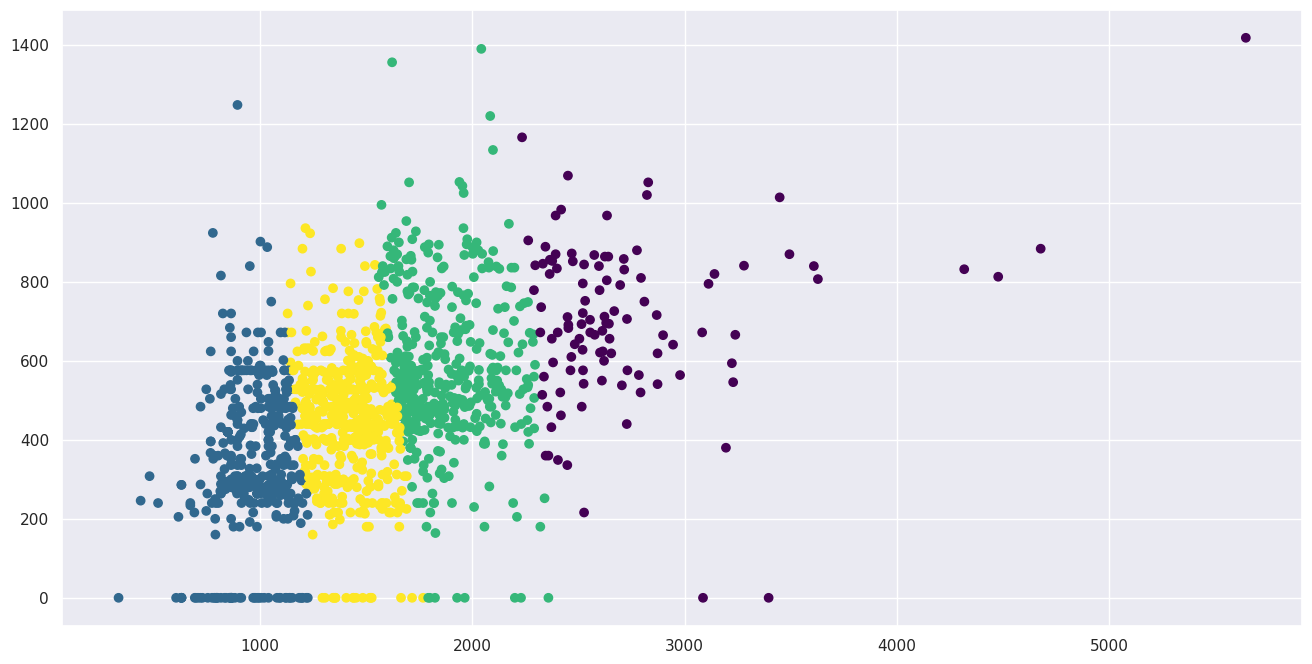

In [13]:
plt.subplots(figsize=(16, 8))
plt.scatter(x="GrLivArea", y="GarageArea", c="Cluster", cmap="viridis", data=labelled_data)

### Problem 2



#### (a)



Extract `GrLivArea` and `GarageArea` from the data set.



In [14]:
extracted_data = house_data[["GrLivArea", "GarageArea"]]

#### (b)



Visualise the distribution of the two variables above using a scatter plot.



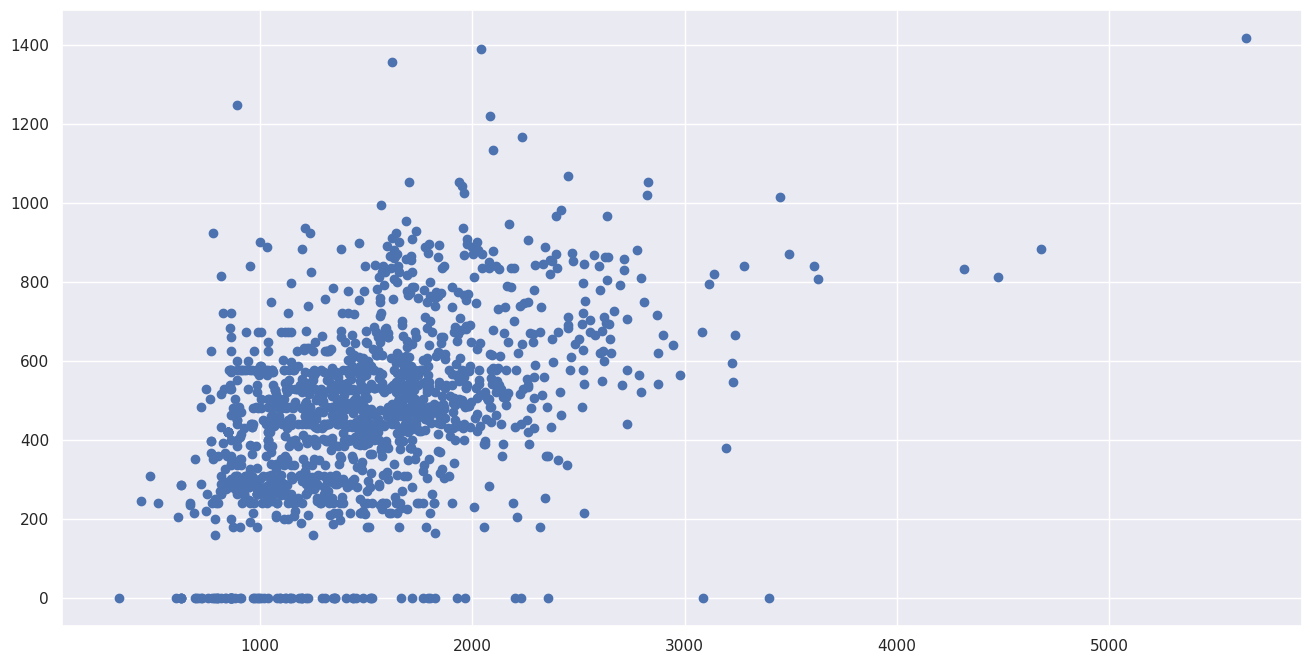

In [15]:
plt.subplots(figsize=(16, 8))
plt.scatter(x="GrLivArea", y="GarageArea", data=extracted_data)

#### (c)



Import the local outlier factor model from `scikit-learn`.



In [16]:
from sklearn.neighbors import LocalOutlierFactor

Set the parameters for the local outlier factor model.



In [17]:
number_of_neighbours = 20
fraction_of_anomalies = 0.05

Create the anomaly detection model using the local outlier factor model with the parameters.



In [18]:
model = LocalOutlierFactor(n_neighbors=number_of_neighbours, contamination=fraction_of_anomalies)

Fit the model on the data and predict anomalies.



In [19]:
model.fit(extracted_data)

LocalOutlierFactor(contamination=0.05)

#### (d)



Use the model to predict the anomalies.



In [20]:
labels = model.fit_predict(extracted_data)

Add the anomaly label to the data.



In [21]:
labelled_data = extracted_data.copy()
labelled_data["Anomaly"] = pd.Categorical(labels)

Plot the count plot of the data based on the labels.



<Axes: xlabel='count', ylabel='Anomaly'>

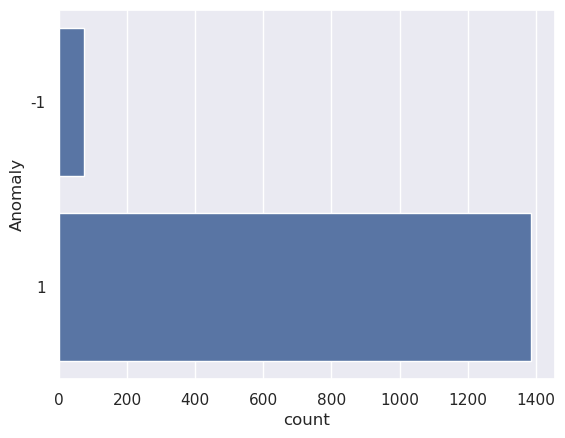

In [22]:
sb.countplot(labelled_data["Anomaly"])

Visualise the anomalies in the data.



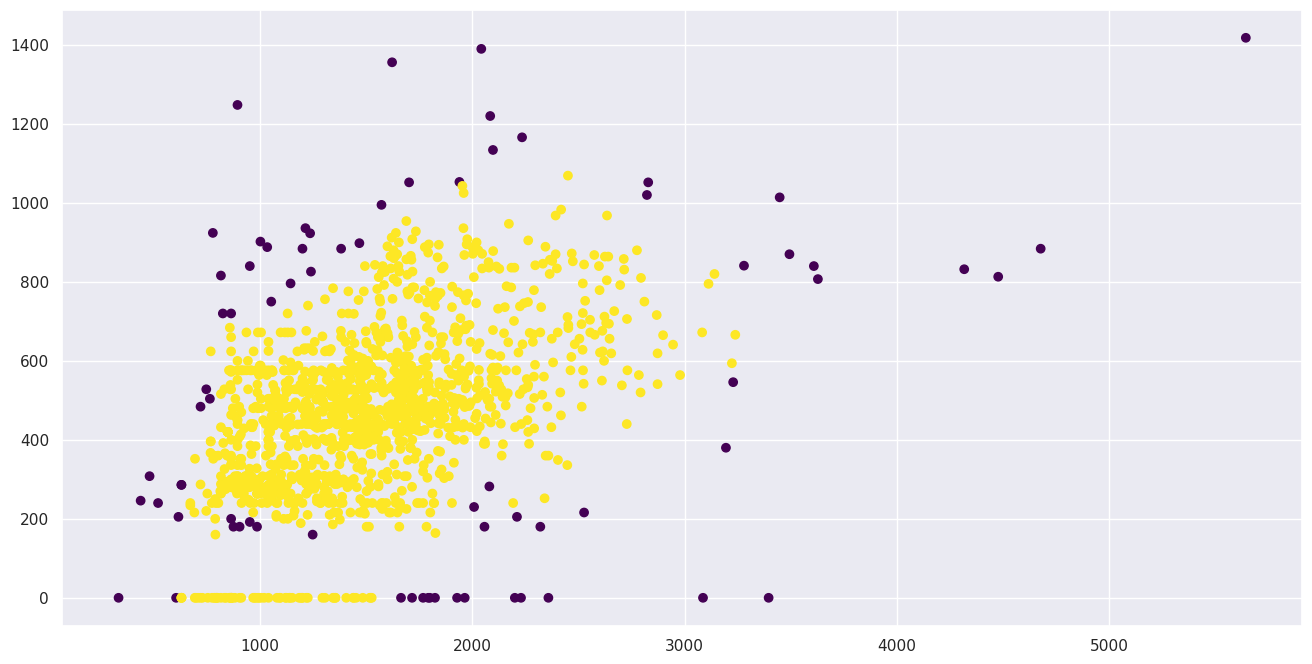

In [23]:
plt.subplots(figsize=(16, 8))
plt.scatter(x="GrLivArea", y="GarageArea", c="Anomaly", cmap="viridis", data=labelled_data)